<a href="https://colab.research.google.com/github/omarlura/talentotech/blob/main/Proyecto_Comentarios_Amazon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<style>
    div.text_cell_render {
        width: 100% !important;
        text-align: justify;
    }
</style>


---
<center>
<img src="https://www.noticiasneo.com/sites/default/files/2019-07/amazon_final.png" style="width:80%; height:auto;">
</center>

# **Análisis comentarios críticos powerbank - Amazon**


## Integrantes del Grupo:
- Cristian Rojas
- Leonardo Ura
- Yulieth Velandia



## Contextualización

Los usuarios comparten sus experiencias en plataformas como Amazon, lo que permite obtener una gran cantidad de datos valiosos a través de las reseñas. Este proyecto se enfoca en analizar los comentarios críticos (con calificación entre 1 y 3 estrellas) de los cargadores portátiles, identificando patrones y clasificando los comentarios según los aspectos negativos que los usuarios destacan. A través de este análisis, se busca identificar áreas de mejora para el producto y proporcionar información útil para los fabricantes.
Para ello, se extrajeron comentarios utilizando técnicas de web scraping. Posteriormente, se llevó a cabo la traducción de los comentarios, la tokenización, limpieza de texto y análisis de sentimientos para obtener insights sobre las opiniones de los usuarios. Finalmente, se categorizan los comentarios según su contenido y se visualizan los hallazgos.


## Objetivo
El objetivo de este proyecto es realizar un análisis de sentimientos y categorización de comentarios críticos sobre 14 modelos de cargadores portátiles (powerbanks) vendidos en Amazon.


                     

## Fuente de datos

## Diccionario de datos


| Columna                     | Descripción                                                                                                 |
|-----------------------------|-------------------------------------------------------------------------------------------------------------|
| **Producto**                | Descripción detallada del producto que fue calificado.                                                      |
| **Usuario**                 | Nombre del usuario que realizó la reseña.                                                                   |
| **Calificación**            | Puntuación otorgada por el usuario al producto, expresada en un formato como "3.0 de 5 estrellas".          |
| **Fecha de la Calificación**| País y fecha en la que el usuario calificó el producto, junto con la ubicación.                                    |
| **Título de la Reseña**     | Título breve de la reseña proporcionado por el usuario.                                                    |
| **Texto de la Reseña**      | Contenido de la reseña en su idioma original, con detalles sobre la experiencia del usuario con el producto.|

In [ ]:
!pip install selenium

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 23.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 481.7/481.7 kB 11.1 MB/s eta 0:00:00


In [ ]:
from selenium import webdriver
from bs4 import BeautifulSoup

In [ ]:
urls_base=[
    'https://www.amazon.com/-/es/Cargador-port%C3%A1til-Display-tel%C3%A9fono-compatible/product-reviews/B08K7GHZ3V/ref=cm_cr_arp_d_viewpnt_rgt?ie=UTF8&reviewerType=all_reviews&pageNumber=1&filterByStar=critical',
    'https://www.amazon.com/-/es/Blavor-cargador-inal%C3%A1mbrico-superbrillante-mosquet%C3%B3n/product-reviews/B07FDXDB3W/ref=cm_cr_arp_d_viewpnt_rgt?ie=UTF8&reviewerType=all_reviews&pageNumber=1&filterByStar=critical',
    'https://www.amazon.com/-/es/Cargador-port%C3%A1til-cargador-pantalla-compatible/product-reviews/B07YPY31FL/ref=cm_cr_arp_d_viewpnt_rgt?ie=UTF8&reviewerType=all_reviews&pageNumber=1&filterByStar=critical',
    'https://www.amazon.com/-/es/Cargador-port%C3%A1til-magn%C3%A9tico-inal%C3%A1mbrico-compatible/product-reviews/B099284SRR/ref=cm_cr_arp_d_viewpnt_rgt?ie=UTF8&reviewerType=all_reviews&pageNumber=1&filterByStar=critical',
    'https://www.amazon.com/-/es/Cargador-port%C3%A1til-pantalla-respaldo-compatible/product-reviews/B09H4GLZXT/ref=cm_cr_arp_d_viewpnt_rgt?ie=UTF8&reviewerType=all_reviews&pageNumber=1&filterByStar=critical',
    'https://www.amazon.com/-/es/Cargador-port%C3%A1til-cargador-bater%C3%ADa-tel%C3%A9fono/product-reviews/B09176JCKZ/ref=cm_cr_arp_d_viewpnt_rgt?ie=UTF8&reviewerType=all_reviews&pageNumber=1&filterByStar=critical',
    'https://www.amazon.com/-/es/Cargador-port%C3%A1til-10000mAh-magn%C3%A9tico-inal%C3%A1mbrico/product-reviews/B0BZVVR495/ref=cm_cr_arp_d_viewpnt_rgt?ie=UTF8&reviewerType=all_reviews&pageNumber=1&filterByStar=critical',
    'https://www.amazon.com/-/es/Cargador-port%C3%A1til-cargador-tel%C3%A9fono-bater%C3%ADa/product-reviews/B0CNXSPJNT/ref=cm_cr_arp_d_viewpnt_rgt?ie=UTF8&reviewerType=all_reviews&pageNumber=1&filterByStar=critical',
    'https://www.amazon.com/-/es/Cargador-port%C3%A1til-Display-tel%C3%A9fono-compatible/product-reviews/B08K7GHZ3V/ref=cm_cr_arp_d_viewpnt_rgt?ie=UTF8&reviewerType=all_reviews&pageNumber=1&filterByStar=critical',
    'https://www.amazon.com/-/es/magn%C3%A9tica-cargador-port%C3%A1til-inal%C3%A1mbrico-compatible/product-reviews/B09NRG4GK3/ref=cm_cr_arp_d_viewpnt_rgt?ie=UTF8&reviewerType=all_reviews&pageNumber=1&filterByStar=critical',
    'https://www.amazon.com/-/es/Cargador-port%C3%A1til-cargador-entrega-PowerCore/product-reviews/B08LH26PFT/ref=cm_cr_arp_d_viewpnt_rgt?ie=UTF8&reviewerType=all_reviews&pageNumber=1&filterByStar=critical',
    'https://www.amazon.com/-/es/conector-integrado-cargador-port%C3%A1til-Samsung/product-reviews/B0C6XK77HJ/ref=cm_cr_arp_d_viewpnt_rgt?ie=UTF8&reviewerType=all_reviews&pageNumber=1&filterByStar=critical',
    'https://www.amazon.com/-/es/Veektomx-Minicargador-port%C3%A1til-bater%C3%ADa-imprescindible/product-reviews/B09BBCPC3X/ref=cm_cr_arp_d_viewpnt_rgt?ie=UTF8&reviewerType=all_reviews&pageNumber=1&filterByStar=critical',
    'https://www.amazon.com/-/es/PowerCore-Essential-tecnolog%C3%ADa-capacidad-compatible/product-reviews/B07S829LBX/ref=cm_cr_arp_d_viewpnt_rgt?ie=UTF8&reviewerType=all_reviews&pageNumber=1&filterByStar=critical',
    'https://www.amazon.com/-/es/Enerwow-Cargador-port%C3%A1til-pantalla-entradas/product-reviews/B0C147N71M/ref=cm_cr_arp_d_viewpnt_rgt?ie=UTF8&reviewerType=all_reviews&pageNumber=1&filterByStar=critical'
]

In [ ]:
 driver = webdriver.Chrome()

# Generar lista completa de URLs para todas las páginas
urls = []
for url_base in urls_base:
    urls += [f"{url_base}&pageNumber={page}&filterByStar=critical" for page in range(1, 11)]


# Inicializar las listas para almacenar los datos temporalmente
data = []

# Iterar sobre cada URL en la lista completa
for url in urls:
    driver.get(url)
    time.sleep(5)

    # Extraer el HTML de la página
    html_data = BeautifulSoup(driver.page_source, 'html.parser')

    # Extraer el nombre del producto (una vez por página)
    try:
        product_name = html_data.find('h1', {'class': 'a-size-large a-text-ellipsis product-info-title'}).text.strip()
    except AttributeError:
        product_name = 'Producto no disponible'

    # Extraer las reseñas
    reviews = html_data.find_all('div', {'data-hook': 'review'})

    # Extraer los datos de cada reseña y guardarlos en la lista de 'data'
    for review in reviews:
        try:
            name = review.find('span', {'class': 'a-profile-name'}).text.strip()
        except AttributeError:
            name = 'Usuario desconocido'

        try:
            rating = review.find('span', {'class': 'a-icon-alt'}).text.strip()
        except AttributeError:
            rating = 'Calificación no disponible'

        try:
            rating_date = review.find('span', {'data-hook': 'review-date'}).text.strip()
        except AttributeError:
            rating_date = 'Fecha no disponible'

        try:
            title = review.find('a', {'data-hook': 'review-title'}).text.strip()
        except AttributeError:
            title = 'Título no disponible'

        try:
            review_text = review.find('span', {'data-hook': 'review-body'}).text.strip()
        except AttributeError:
            review_text = 'Texto no disponible'

        # Agregar todos los datos de la reseña como una fila en la lista 'data'
        data.append([product_name, name, rating, rating_date, title, review_text])
     # Verificar si hay más páginas
        url_check = html_data.find('li', {'class': 'a-last'})
        if url_check is None or url_check.a is None:
            url = None  # Si no hay más páginas, salir del bucle
        else:
            # Formar la URL de la siguiente página
            url = 'https://www.amazon.com' + url_check.a['href']

        print(f'Siguiente página de reseñas: {url}')

# Cerrar el driver
driver.quit()

# Convertir la lista de datos en un DataFrame de pandas
df = pd.DataFrame(data, columns=['Producto','Usuario', 'Calificación', 'Fecha de la Calificación', 'Título de la Reseña', 'Texto de la Reseña'])

# Mostrar las primeras filas del DataFrame
print(df.head())


SessionNotCreatedException: Message: session not created: Chrome failed to start: exited normally.
  (session not created: DevToolsActivePort file doesn't exist)
  (The process started from chrome location /root/.cache/selenium/chrome/linux64/131.0.6778.69/chrome is no longer running, so ChromeDriver is assuming that Chrome has crashed.)
Stacktrace:
#0 0x596712fbc4ca <unknown>
#1 0x596712acf620 <unknown>
#2 0x596712b06ce8 <unknown>
#3 0x596712b02846 <unknown>
#4 0x596712b4e606 <unknown>
#5 0x596712b4dc56 <unknown>
#6 0x596712b42113 <unknown>
#7 0x596712b10be0 <unknown>
#8 0x596712b11bbe <unknown>
#9 0x596712f88e4b <unknown>
#10 0x596712f8cde2 <unknown>
#11 0x596712f75d2c <unknown>
#12 0x596712f8d957 <unknown>
#13 0x596712f5b4bf <unknown>
#14 0x596712fab348 <unknown>
#15 0x596712fab510 <unknown>
#16 0x596712fbb346 <unknown>
#17 0x7ee4f9163ac3 <unknown>


## Procesamiento del texto

*01. Instalación de libreria gdown para leer la base desde una ubicación compartida en Google Drive.*

In [ ]:
!pip install gdown

*02. Importamos las liberias que necesitamos para analizar la fuente de datos.*

In [ ]:
import pandas as pd
import gdown
import time
import pandas as pd
import numpy as np
import re
import string
import json
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


*03. File_Id es el identificador de nuestro archivo compartido a traves de Google Drive.
Url es el vinculo comun denominador que se obtiene al compartir un archivo a traves de Google Drive.*

In [ ]:
file_id = '1QIrMVqvG4_-RjILqDu0ADHyA73A2BD_l'
url = f'https://drive.google.com/uc?id={file_id}'
gdown.download(url, 'comentarios_criticos.xlsx', quiet=False)


Downloading...
From: https://drive.google.com/uc?id=1QIrMVqvG4_-RjILqDu0ADHyA73A2BD_l
To: /content/comentarios_criticos.xlsx
100%|██████████| 284k/284k [00:00<00:00, 74.8MB/s]


'comentarios_criticos.xlsx'

*04. Una vez se obtiene la ruta del archivo, leemos el archivo y lo asociamos a un nombre de variable (data).*

In [ ]:
data = pd.read_excel('comentarios_criticos.xlsx')

*5. Con la función data.head() buscamos visualizar rapidamente las primeras filas del dataframe*

In [ ]:
data.head()

,Unnamed: 0,Producto,Usuario,Calificación,Fecha de la Calificación,Título de la Reseña,Texto de la Reseña
0,0,"Cargador portátil INIU, 18 W PD 3.0 QC 4.0 car...",Nicolas Hernandez,3.0 de 5 estrellas,Calificado en Estados Unidos el 3 de julio de ...,3.0 de 5 estrellas\nRegular,Cargo por iPhone 13 Pro desde 20% hasta 70% y ...
1,1,"Cargador portátil INIU, 18 W PD 3.0 QC 4.0 car...",David A. Soussan,3.0 de 5 estrellas,Calificado en Estados Unidos el 16 de agosto d...,3.0 de 5 estrellas\nCan't get more than 1A out...,EDIT 4/6/2023: Well the BG-123 didn't last lon...
2,2,"Cargador portátil INIU, 18 W PD 3.0 QC 4.0 car...",Stacy,2.0 de 5 estrellas,Calificado en Estados Unidos el 23 de octubre ...,2.0 de 5 estrellas\nless than 9 months,"This product has come in handy, but I have onl..."
3,3,"Cargador portátil INIU, 18 W PD 3.0 QC 4.0 car...",Nathan,2.0 de 5 estrellas,Calificado en Estados Unidos el 18 de julio de...,"2.0 de 5 estrellas\nSlower, heavier, more inco...",Charges slowly. Bigger than the moderately mor...
4,4,"Cargador portátil INIU, 18 W PD 3.0 QC 4.0 car...",Susan,2.0 de 5 estrellas,Calificado en Estados Unidos el 15 de octubre ...,"2.0 de 5 estrellas\nNOT ""Fast Charging""",We finally got this charger fully charged afte...


6. Vamos a instalar Googletrans con el ánimo de permitirnos lograr la traducción de contenido

In [ ]:
!pip install deep-translator


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 1.6 MB/s eta 0:00:00


7. Aqui vamos a importar la liberaria que necesitamos para traducir el contenido a traves de la herramienta (Translator)


In [ ]:
from deep_translator import GoogleTranslator

8. En este codigo queremos automatizar la traducción, agregar una columna con la traducción al dataframe original, para facilitar el análisis.


In [ ]:
def translate_to_spanish(text):
    try:
        return GoogleTranslator(source='auto', target='es').translate(text)
    except Exception as e:
        print(f"Error al traducir: {e}")
        return text

# Aplica la función de traducción a cada fila y crea una nueva columna
data['texto de la reseña traducida'] = data['Texto de la Reseña'].apply(translate_to_spanish)

# Muestra el DataFrame con las traducciones
print(data[['Texto de la Reseña', 'texto de la reseña traducida']].head())

*9. Aqui nuevamente invocamos el data.head() para verificar la nueva columna con la traducción y almacenamos el dataframe.*

In [ ]:
data.head()

,Unnamed: 0,Producto,Usuario,Calificación,Fecha de la Calificación,Título de la Reseña,Texto de la Reseña,texto de la reseña traducida
0,0,"Cargador portátil INIU, 18 W PD 3.0 QC 4.0 car...",Nicolas Hernandez,3.0 de 5 estrellas,Calificado en Estados Unidos el 3 de julio de ...,3.0 de 5 estrellas\nRegular,Cargo por iPhone 13 Pro desde 20% hasta 70% y ...,Cargo por iPhone 13 Pro desde 20% hasta 70% y ...
1,1,"Cargador portátil INIU, 18 W PD 3.0 QC 4.0 car...",David A. Soussan,3.0 de 5 estrellas,Calificado en Estados Unidos el 16 de agosto d...,3.0 de 5 estrellas\nCan't get more than 1A out...,EDIT 4/6/2023: Well the BG-123 didn't last lon...,"EDITAR 4/6/2023: Bueno, la BG-123 no duró much..."
2,2,"Cargador portátil INIU, 18 W PD 3.0 QC 4.0 car...",Stacy,2.0 de 5 estrellas,Calificado en Estados Unidos el 23 de octubre ...,2.0 de 5 estrellas\nless than 9 months,"This product has come in handy, but I have onl...","Este producto me ha resultado útil, pero solo ..."
3,3,"Cargador portátil INIU, 18 W PD 3.0 QC 4.0 car...",Nathan,2.0 de 5 estrellas,Calificado en Estados Unidos el 18 de julio de...,"2.0 de 5 estrellas\nSlower, heavier, more inco...",Charges slowly. Bigger than the moderately mor...,Carga lentamente. Es más grande que el modelo ...
4,4,"Cargador portátil INIU, 18 W PD 3.0 QC 4.0 car...",Susan,2.0 de 5 estrellas,Calificado en Estados Unidos el 15 de octubre ...,"2.0 de 5 estrellas\nNOT ""Fast Charging""",We finally got this charger fully charged afte...,Finalmente pudimos cargar completamente este c...


*10. Con "clean_text" vamos a eliminar caracteres y digitos innecesarios. Tambien remueve signos como "!", vuelve el texto totalmente en minuscula y elimina espacios en blanco alrededor del texto.*

 *La instrucción "if not isinstance(text, str): return """ verifica que el valor sea de tipo string, si no, deberá convertirlo en una cadena vacía.*

In [ ]:
import re
import string

# Limpiar los comentarios
def clean_text(text):
    # Verificar si el valor es una cadena de texto
    if not isinstance(text, str):
        return ''  # Retornar una cadena vacía si no es un texto válido

    # Remover acentos
    text = re.sub(r'á|à|ä|â|ã|å', 'a', text)
    text = re.sub(r'é|è|ë|ê', 'e', text)
    text = re.sub(r'í|ì|ï|î', 'i', text)
    text = re.sub(r'ó|ò|ö|ô|õ|ø', 'o', text)
    text = re.sub(r'ú|ù|ü|û', 'u', text)
    text = re.sub(r'ñ', 'n', text)

    # Remover la frase "No se pudo cargar el archivo multimedia"
    text = re.sub(r'no se pudo cargar el archivo multimedia', '', text, flags=re.IGNORECASE)

    # Eliminar puntuación y números
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = re.sub(r'\d+', '', text)

    # Convertir a minúsculas y eliminar espacios al inicio y al final
    text = text.lower().strip()

    # Eliminar saltos de línea, tabulaciones, y espacios repetidos
    text = re.sub(r'\s+', ' ', text)  # Reemplazar múltiples espacios/saltos de línea con un solo espacio

    # Quitar caracteres de puntuación adicionales
    punctuation_to_remove = '¡¿´'
    text = text.translate(str.maketrans('', '', punctuation_to_remove))

    # Eliminar palabras de 3 o menos letras y palabras específicas
    stop_words = {'bateria', 'telefono','carga','cargar','cargador', 'cargo'}
    words = text.split()  # Dividir el texto en palabras
    words = [word for word in words if len(word) > 3 and word not in stop_words]  # Filtrar palabras
    text = ' '.join(words)  # Volver a unir las palabras en un solo texto

    return text

# Aplicar la limpieza, manejando valores NaN o None
data['Datos limpios'] = data['texto de la reseña traducida'].apply(lambda x: clean_text(x) if isinstance(x, str) else '')

# Mostrar resultados
print(data['Datos limpios'])

0                       iphone desde hasta descargo hasta
1       editar bueno duro mucho indicador esta parcial...
2       este producto resultado util pero solo usado u...
3       lentamente grande modelo moderadamente caro mi...
4       finalmente pudimos completamente este despues ...
                              ...                        
1485    puede usar porque cubierta plastico cubre parc...
1486    cada enchufo articulo para cargarlo tengo pres...
1487                        producto funciona apenas duro
1488    lamento haber tenido devolverlo tiene cable co...
1489    esta cosa tarda eternidad cargarse menos horas...
Name: Datos limpios, Length: 1490, dtype: object


*11. Validamos a traves de los encabezados y primeras filas que el ajuste anterior haya sido exitoso en el dataframe.*

In [ ]:
data.head()

,Unnamed: 0,Producto,Usuario,Calificación,Fecha de la Calificación,Título de la Reseña,Texto de la Reseña,texto de la reseña traducida,Datos limpios
0,0,"Cargador portátil INIU, 18 W PD 3.0 QC 4.0 car...",Nicolas Hernandez,3.0 de 5 estrellas,Calificado en Estados Unidos el 3 de julio de ...,3.0 de 5 estrellas\nRegular,Cargo por iPhone 13 Pro desde 20% hasta 70% y ...,Cargo por iPhone 13 Pro desde 20% hasta 70% y ...,iphone desde hasta descargo hasta
1,1,"Cargador portátil INIU, 18 W PD 3.0 QC 4.0 car...",David A. Soussan,3.0 de 5 estrellas,Calificado en Estados Unidos el 16 de agosto d...,3.0 de 5 estrellas\nCan't get more than 1A out...,EDIT 4/6/2023: Well the BG-123 didn't last lon...,"EDITAR 4/6/2023: Bueno, la BG-123 no duró much...",editar bueno duro mucho indicador esta parcial...
2,2,"Cargador portátil INIU, 18 W PD 3.0 QC 4.0 car...",Stacy,2.0 de 5 estrellas,Calificado en Estados Unidos el 23 de octubre ...,2.0 de 5 estrellas\nless than 9 months,"This product has come in handy, but I have onl...","Este producto me ha resultado útil, pero solo ...",este producto resultado util pero solo usado u...
3,3,"Cargador portátil INIU, 18 W PD 3.0 QC 4.0 car...",Nathan,2.0 de 5 estrellas,Calificado en Estados Unidos el 18 de julio de...,"2.0 de 5 estrellas\nSlower, heavier, more inco...",Charges slowly. Bigger than the moderately mor...,Carga lentamente. Es más grande que el modelo ...,lentamente grande modelo moderadamente caro mi...
4,4,"Cargador portátil INIU, 18 W PD 3.0 QC 4.0 car...",Susan,2.0 de 5 estrellas,Calificado en Estados Unidos el 15 de octubre ...,"2.0 de 5 estrellas\nNOT ""Fast Charging""",We finally got this charger fully charged afte...,Finalmente pudimos cargar completamente este c...,finalmente pudimos completamente este despues ...


*12. Se limpia la fecha eliminando la frase Calificado en Estados Unidos, transformando los nombres de los meses y aplicando el formato de fecha*

In [ ]:
# Quitar la frase "Calificado en Estados Unidos el "
data['Fecha Extraída'] = data['Fecha de la Calificación'].str.replace('Calificado en Estados Unidos el ', '')

In [ ]:
df = pd.DataFrame(data)

# Función para transformar la fecha
def transformar_fecha(fecha):
    # Reemplazar " de " por un guion
    fecha = fecha.replace(' de ', '-')
    return fecha

# Función para reemplazar los nombres de los meses
def reemplazar_meses(fecha):
    meses = {
        'enero': 'January',
        'febrero': 'February',
        'marzo': 'March',
        'abril': 'April',
        'mayo': 'May',
        'junio': 'June',
        'julio': 'July',
        'agosto': 'August',
        'septiembre': 'September',
        'octubre': 'October',
        'noviembre': 'November',
        'diciembre': 'December'
    }

    for mes_es, mes_en in meses.items():
        fecha = fecha.replace(mes_es, mes_en)

    return fecha

# Aplicar la transformación y reemplazo de meses
df['fecha_formateada'] = df['Fecha Extraída'].apply(transformar_fecha).apply(reemplazar_meses)

# Convertir la columna 'fecha_formateada' a datetime
df['fecha_datetime'] = pd.to_datetime(df['fecha_formateada'], format='%d-%B-%Y')

df.head()

,Unnamed: 0,Producto,Usuario,Calificación,Fecha de la Calificación,Título de la Reseña,Texto de la Reseña,texto de la reseña traducida,Datos limpios,Fecha Extraída,fecha_formateada,fecha_datetime
0,0,"Cargador portátil INIU, 18 W PD 3.0 QC 4.0 car...",Nicolas Hernandez,3.0 de 5 estrellas,Calificado en Estados Unidos el 3 de julio de ...,3.0 de 5 estrellas\nRegular,Cargo por iPhone 13 Pro desde 20% hasta 70% y ...,Cargo por iPhone 13 Pro desde 20% hasta 70% y ...,iphone desde hasta descargo hasta,3 de julio de 2024,3-July-2024,2024-07-03
1,1,"Cargador portátil INIU, 18 W PD 3.0 QC 4.0 car...",David A. Soussan,3.0 de 5 estrellas,Calificado en Estados Unidos el 16 de agosto d...,3.0 de 5 estrellas\nCan't get more than 1A out...,EDIT 4/6/2023: Well the BG-123 didn't last lon...,"EDITAR 4/6/2023: Bueno, la BG-123 no duró much...",editar bueno duro mucho indicador esta parcial...,16 de agosto de 2022,16-August-2022,2022-08-16
2,2,"Cargador portátil INIU, 18 W PD 3.0 QC 4.0 car...",Stacy,2.0 de 5 estrellas,Calificado en Estados Unidos el 23 de octubre ...,2.0 de 5 estrellas\nless than 9 months,"This product has come in handy, but I have onl...","Este producto me ha resultado útil, pero solo ...",este producto resultado util pero solo usado u...,23 de octubre de 2024,23-October-2024,2024-10-23
3,3,"Cargador portátil INIU, 18 W PD 3.0 QC 4.0 car...",Nathan,2.0 de 5 estrellas,Calificado en Estados Unidos el 18 de julio de...,"2.0 de 5 estrellas\nSlower, heavier, more inco...",Charges slowly. Bigger than the moderately mor...,Carga lentamente. Es más grande que el modelo ...,lentamente grande modelo moderadamente caro mi...,18 de julio de 2024,18-July-2024,2024-07-18
4,4,"Cargador portátil INIU, 18 W PD 3.0 QC 4.0 car...",Susan,2.0 de 5 estrellas,Calificado en Estados Unidos el 15 de octubre ...,"2.0 de 5 estrellas\nNOT ""Fast Charging""",We finally got this charger fully charged afte...,Finalmente pudimos cargar completamente este c...,finalmente pudimos completamente este despues ...,15 de octubre de 2024,15-October-2024,2024-10-15


*13.Mediante el uso de expresiones regulares se limpia el texto para extraer la capacidad de las powerbank*

In [ ]:
# Reemplazar la coma en los números (10,000 y 5,000)
df['Producto'] = df['Producto'].str.replace(r'(\d+),(\d+)', r'\1\2', regex=True)

In [ ]:
def extraer_capacidad(texto):
    match = re.search(r'\d+\s*mAh', texto)
    if match:
        # Elimina cualquier caracter que no sea un dígito antes de la conversión
        capacidad = re.sub(r"\D", "", match.group().replace(' mAh', ''))
        return int(capacidad)
    return None

def extraer_nombre(texto):
    # Buscamos la primera parte del texto hasta encontrar un número o una coma
    match = re.search(r'^(.*?)(?:\d+|,)', texto)
    if match:
        return match.group(1).strip()
    return None

In [ ]:
df['Capacidad'] = df['Producto'].apply(extraer_capacidad)
df['Nombre'] = df['Producto'].apply(extraer_nombre)

*14. Procedemos a traer el modulo stopwords y nltk.tokenize para eliminar palabras comunes y para tokenizar el texto, en aras de optener un análisis más granular.*

In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

*15. Con la siguiente instrucción, queremos tokenizar las palabras, carga y define los stopwords para cargar palabras vacias que generalmente no aportan significado en tareas de análisis. Luego de eliminar las palabras vacias, unir aquellas palabras de texto restantes y dejar las palabras relevantes.*

*Ejemplo de uso:*
    
    text = "Este es un ejemplo de texto."
    resultado = palabras_vacias(text)
    print(resultado)  # Output: "ejemplo texto"

In [ ]:
def palabras_vacias(text):

    # Tokenizar (dividir en palabras)
    words = word_tokenize(text)

    # Eliminar stopwords (palabras vacías)
    stop_words = set(stopwords.words('spanish'))  # Usar español como idioma
    words = [word for word in words if word not in stop_words]

    return ' '.join(words)

*16. Aquie validamos la aplicación de la función palabras_vacias a cada valor de la columna en el DataFrame data y guarda los resultados en una nueva columna llamada "tokenizadas"*

In [ ]:
df['tokenizadas'] = df['Datos limpios'].apply(palabras_vacias)

In [ ]:
df.sample(n=5)

,Unnamed: 0,Producto,Usuario,Calificación,Fecha de la Calificación,Título de la Reseña,Texto de la Reseña,texto de la reseña traducida,Datos limpios,Fecha Extraída,fecha_formateada,fecha_datetime,Capacidad,Nombre,tokenizadas
628,628,"INIU Cargador portátil Magsafe, pequeño 10000m...",Chris Clark,2.0 de 5 estrellas,Calificado en Estados Unidos el 15 de agosto d...,2.0 de 5 estrellas\nDoes not stay on phone,I bought this thinking it stuck to the phone a...,Lo compré pensando que se pegaba al teléfono y...,compre pensando pegaba podria eliminar necesid...,15 de agosto de 2024,15-August-2024,2024-08-15,10000,INIU Cargador portátil Magsafe,compre pensando pegaba podria eliminar necesid...
1358,1358,"Cargador portátil Anker, PowerCore Essential 2...",Bulldog,3.0 de 5 estrellas,Calificado en Estados Unidos el 3 de agosto de...,"3.0 de 5 estrellas\nCharges kind of slow, batt...",The charging speed is slower than I expected. ...,La velocidad de carga es más lenta de lo que e...,velocidad lenta esperaba embargo galaxy desde ...,3 de agosto de 2023,3-August-2023,2023-08-03,20000,Cargador portátil Anker,velocidad lenta esperaba embargo galaxy cero v...
1389,1389,"Cargador portátil Anker, PowerCore Essential 2...",Moses,1.0 de 5 estrellas,Calificado en Estados Unidos el 29 de agosto d...,"1.0 de 5 estrellas\nButton broken, Not charging.",I ordered the Anker Portable Charger Power Ban...,Pedí el cargador portátil de batería Anker de ...,pedi portatil anker poweriq interfaz boton uni...,29 de agosto de 2024,29-August-2024,2024-08-29,20000,Cargador portátil Anker,pedi portatil anker poweriq interfaz boton uni...
1084,1084,"Anker Cargador portátil, cargador portátil USB...",Paige,1.0 de 5 estrellas,Calificado en Estados Unidos el 6 de septiembr...,1.0 de 5 estrellas\nNot a good product,"I’ve used this brand before and loved it, but ...","He usado esta marca antes y me encantó, pero n...",usado esta marca antes encanto pero compren es...,6 de septiembre de 2024,6-September-2024,2024-09-06,10000,Anker Cargador portátil,usado marca encanto compren producto lentament...
578,578,"INIU Cargador portátil, cargador de batería má...",Reviewer G,2.0 de 5 estrellas,Calificado en Estados Unidos el 31 de mayo de ...,"2.0 de 5 estrellas\nSeems like a great unit, h...",Update 6 months later: I plug two things into ...,Actualización 6 meses después: conecto dos cos...,actualizacion meses despues conecto cosas puer...,31 de mayo de 2022,31-May-2022,2022-05-31,10000,INIU Cargador portátil,actualizacion meses despues conecto cosas puer...


17. Este código agrega una columna "tokenizadas_len" al dataFrame.  Este campo contiene el número de palabras en cada texto de la columna "tokenizadas". Este se obtiene a traves del calculo de la división del texto en palabras y la medición de su longitud.

In [ ]:
df["tokenizadas_len"] = df["tokenizadas"].apply(lambda x : len(x.split()))

18. Este código imprime la longitud (en palabras) de la reseña más larga en el dataFrame, usando la columna tokenizadas_len. Conocer la reseña de mayor tamaño ayuda a tomar decisiones informadas sobre cómo tratar los datos, optimizar el procesamiento, realizar un análisis más preciso y garantizar la calidad y balance en los datos.

In [ ]:
print("Reseña de mayor tamaño: {} words".format(df['tokenizadas_len'].max()))

Reseña de mayor tamaño: 365 words


19. Con el siguiente codigo vamos a gráficar a traves de una esquema gráfico de barras la distribución de la longitud de las reseñas,es decir, validar con qué frecuencia se reseña con un determinado número de palabras

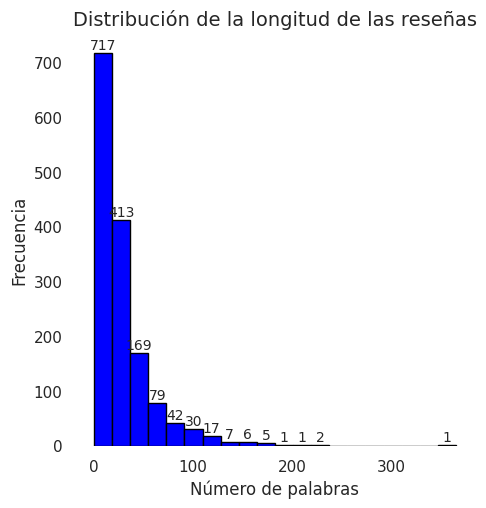

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear el histograma sin la curva KDE y con barras rojas
sns.displot(df.tokenizadas_len, kde=False, color='red')

# Personalizar los títulos de los ejes en español
plt.xlabel('Número de palabras', fontsize=12)  # Eje X: Longitud de las reseñas en palabras
plt.ylabel('Frecuencia', fontsize=12)  # Eje Y: Frecuencia de reseñas con esa longitud

# Título del gráfico
plt.title('Distribución de la longitud de las reseñas', fontsize=14)

# Eliminar las líneas de fondo y bordes del gráfico
sns.set(style="white")  # Fondo blanco sin rejilla

# Eliminar la cuadrícula de fondo (líneas de la rejilla)
plt.grid(False)  # Desactiva la cuadrícula de fondo

# Eliminar las líneas de los bordes del gráfico
plt.gca().spines['top'].set_visible(False)  # Eliminar la línea superior
plt.gca().spines['right'].set_visible(False)  # Eliminar la línea derecha
plt.gca().spines['left'].set_visible(False)  # Eliminar la línea izquierda
plt.gca().spines['bottom'].set_visible(False)  # Eliminar la línea inferior

# Eliminar el marco del gráfico
plt.gca().patch.set_visible(False)  # Eliminar el fondo del gráfico

# Obtener los valores del histograma
count, bins, patches = plt.hist(df.tokenizadas_len, bins=20, color='blue', edgecolor='black')

# Añadir las etiquetas sobre cada barra, separadas verticalmente y evitar ceros
for i in range(len(count)):
    if count[i] > 0:  # Solo mostrar etiquetas para barras con valores mayores a 0
        plt.text(bins[i] + (bins[i+1] - bins[i]) / 2, count[i] + 1,  # Ajustar posición vertical
                 f'{int(count[i])}', ha='center', va='bottom', fontsize=10)

# Mostrar el gráfico
plt.show()

20. Instalamos la libreria wordcloud para generar nubes de palabras.

In [ ]:
!pip install wordcloud

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

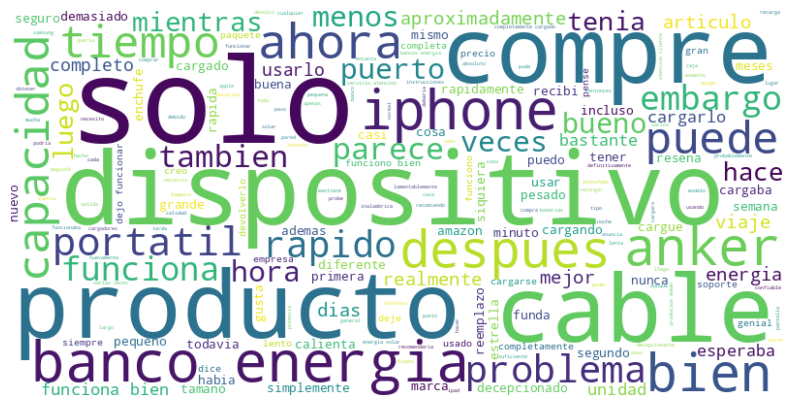

In [ ]:


# Unir todos los comentarios limpios en un solo texto
text = ' '.join(df['tokenizadas'])

# Crear la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Graficar la nube de palabras
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # No mostrar los ejes
plt.show()


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
nltk.download('stopwords')

# Usar stopwords en español
stop_words = list(set(stopwords.words('spanish')))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Crear una instancia de TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words=stop_words)

# Aplicar TF-IDF a la columna de comentarios
tfidf_matrix = tfidf_vectorizer.fit_transform(df['tokenizadas'])

# Convertir el resultado en un DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Sumar los valores de TF-IDF para cada palabra a través de todos los comentarios
total_tfidf_scores = tfidf_df.sum(axis=0)

# Ordenar las palabras por su puntuación total de TF-IDF de mayor a menor
important_words = total_tfidf_scores.sort_values(ascending=False)

# Mostrar las palabras más importantes y sus puntajes
print(important_words.head(10))

solo        44.878771
bien        40.828553
energia     37.337958
funciona    35.713437
compre      34.166766
rapido      33.512566
iphone      32.778126
cable       32.215857
despues     31.343938
producto    31.302772
dtype: float64


## Análisis de sentimientos

El análisis de sentimientos es una técnica que ayuda a entender si el tono de un texto es positivo, negativo o neutral. Básicamente, analiza las palabras para identificar emociones o actitudes en el mensaje.

### Análisis de sentimientos con la librería Textblob

TextBlob es una librería de Python que facilita el análisis de texto, incluyendo el análisis de sentimientos, de manera sencilla. Con TextBlob, puedes analizar el sentimiento de un texto y clasificarlo como positivo, negativo o neutral,

In [ ]:
#Analisis de sentimiento a los comentarios limpios
#Clasificacion Positivo, Negativo, Neutral
def get_sentiment_textblob(text):
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

df['Sentiment_Textblob'] = df['Datos limpios'].apply(get_sentiment_textblob)

El siguiente código genera un gráfico de barras que muestra la distribución de los sentimientos (Positivo, Negativo, Neutral) en los comentarios de la columna Sentiment_Textblob del DataFrame df

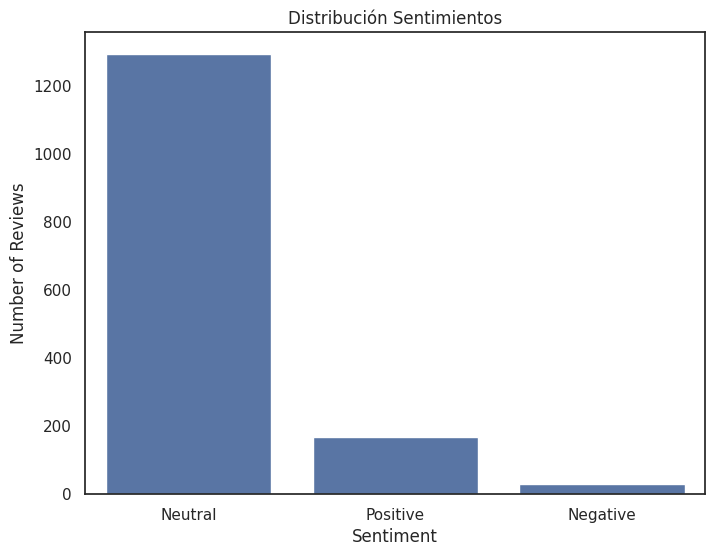

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x='Sentiment_Textblob', data=df)
plt.title('Distribución Sentimientos')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.show()

En esta gráfica buscamos mostrar la relación entre las calificaciones de los comentarios y los sentimientos (Positivo, Negativo, Neutral)

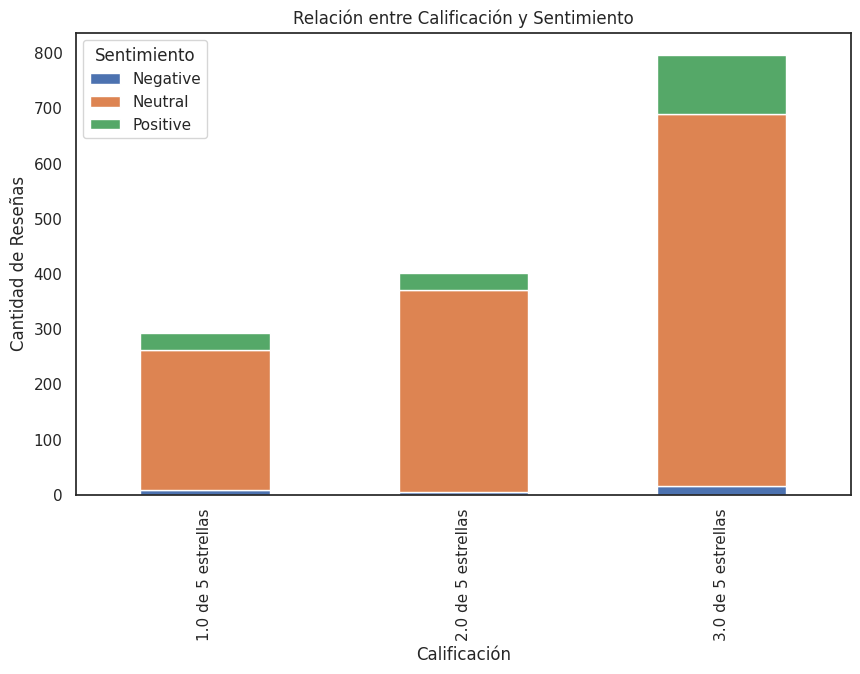

In [ ]:
sentiment_by_rating = df.groupby(['Calificación', 'Sentiment_Textblob']).size().unstack(fill_value=0)
sentiment_by_rating.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Relación entre Calificación y Sentimiento')
plt.xlabel('Calificación')
plt.ylabel('Cantidad de Reseñas')
plt.legend(title='Sentimiento')
plt.show()

En este gráfico buscamos analizar como cambian los sentimientos (Positivo, Negativo, Neutral) a lo largo del tiempo en función de las fechas

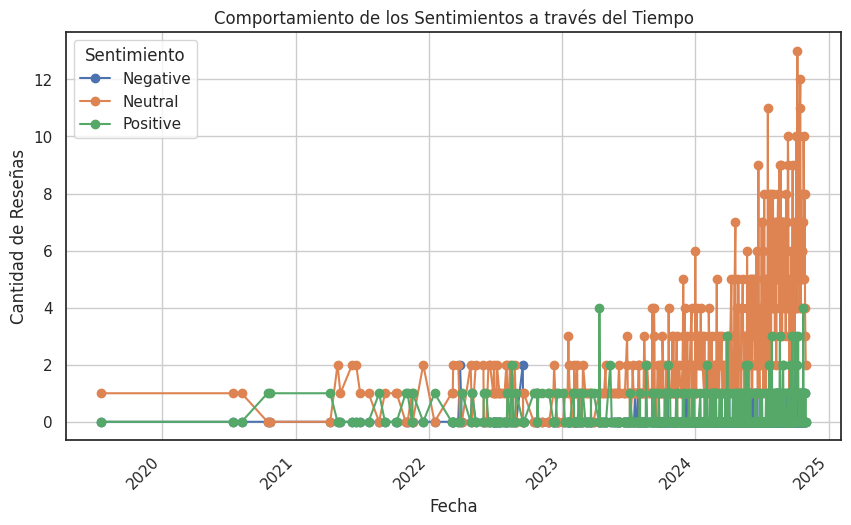

In [ ]:
# Agrupar los datos por fecha y categoría de sentimiento (positivo, negativo, neutral)
df_grouped = df.groupby(['fecha_datetime', 'Sentiment_Textblob']).size().unstack(fill_value=0)

# Graficar los resultados
df_grouped.plot(kind='line', figsize=(10, 6), marker='o')

# Títulos y etiquetas
plt.title('Comportamiento de los Sentimientos a través del Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de Reseñas')
plt.grid(True)
plt.xticks(rotation=45)  # Rotar las fechas para mejor visibilidad
plt.legend(title='Sentimiento')
plt.show()

### Análisis de sentimientos con modelo BERT

Se toma de hugginface un modelo de análisis de sentimiento preentrenado que clasifica el texto como negativo, positivo o neutral. Hugging Face, es una plataforma para trabajar con modelos de procesamiento de lenguaje natural (NLP).

In [ ]:
from transformers import pipeline

#Modelo de aprendizaje BERT
sentiment_pipeline = pipeline('sentiment-analysis')

def get_sentiment_transformers(text):
    result = sentiment_pipeline(text[:512])
    return result[0]['label']

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Con esta linea de codigo buscamos que cada comentario en la columna Datos limpios obtenga una clasificación de sentimiento en la nueva columna Sentiment_BERT.

In [ ]:
df['Sentiment_BERT'] = df['Datos limpios'].apply(get_sentiment_transformers)

Aqui buscamos visualizar la distribución de los sentimientos en los comentarios del DataFrame.

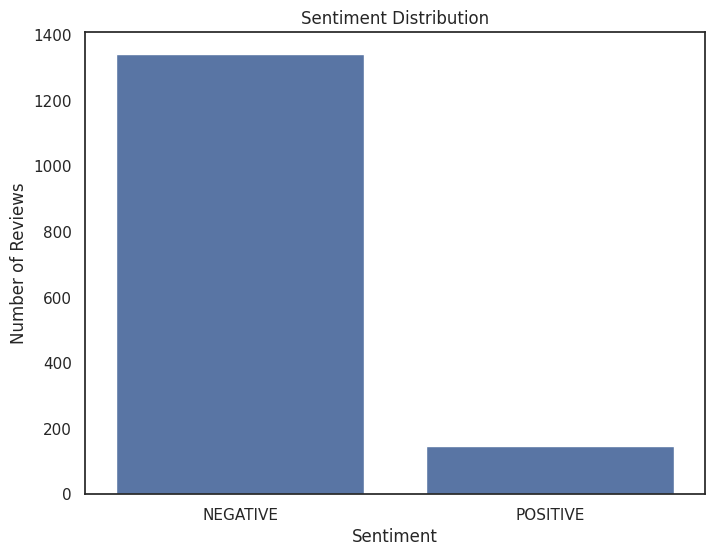

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x='Sentiment_BERT', data=df)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.show()

En este gráfico buscarmos analizar cómo varían los sentimientos según las calificaciones de los comentarios.

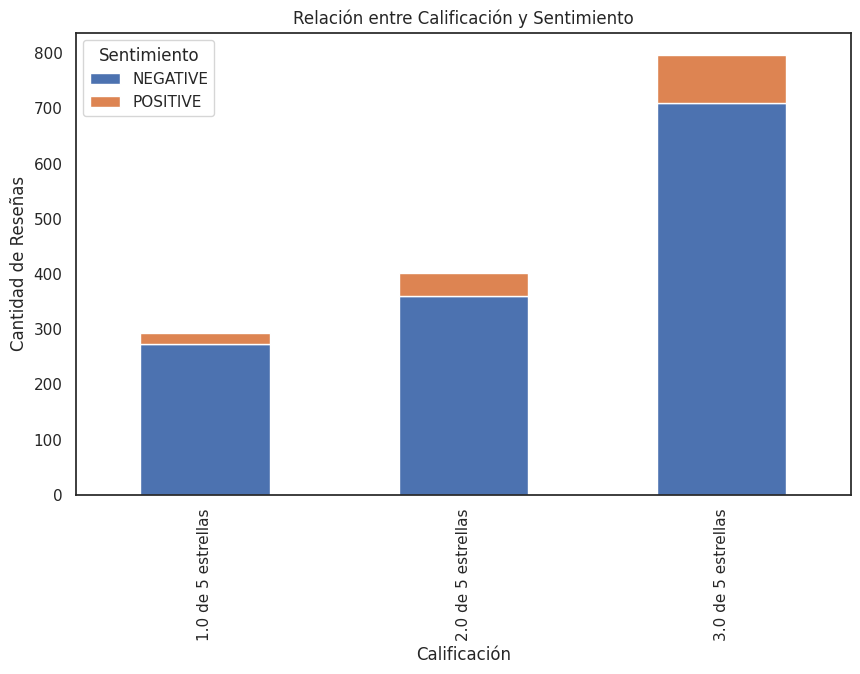

In [ ]:
sentiment_by_rating = df.groupby(['Calificación', 'Sentiment_BERT']).size().unstack(fill_value=0)
sentiment_by_rating.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Relación entre Calificación y Sentimiento')
plt.xlabel('Calificación')
plt.ylabel('Cantidad de Reseñas')
plt.legend(title='Sentimiento')
plt.show()

###Modelo BERT (2)

Aqui utilizamos el modelo XLM-RoBERTa preentrenado de Cardiff NLP diseñado para el análisis de sentimientos en textos de Twitter en varios idiomas.

In [ ]:
#Modelo BERT 2
sentiment_pipeline2 = pipeline("text-classification", model="cardiffnlp/twitter-xlm-roberta-base-sentiment")

def get_sentiment_pipe2(text):
    result = sentiment_pipeline2(text[:512])
    return result[0]['label']

In [ ]:
df['Sentiment_BERT_2'] = df['Datos limpios'].apply(get_sentiment_pipe2)

Aqui buscamos visualizar la distribución de los sentimientos en los comentarios del DataFrame.

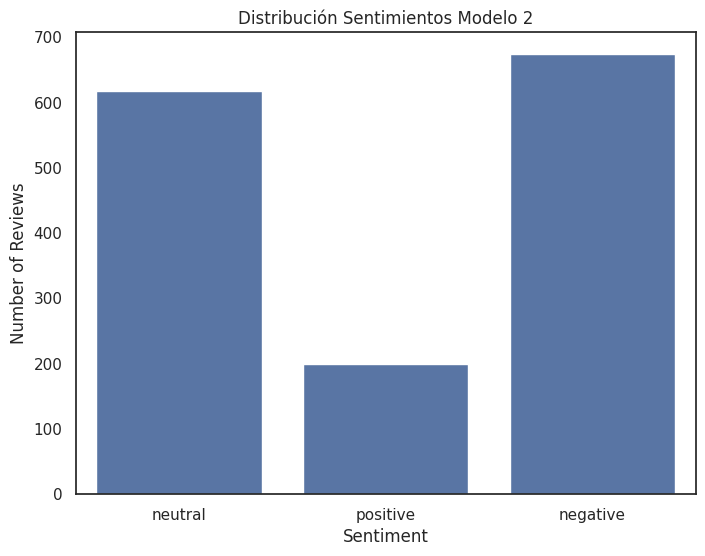

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x='Sentiment_BERT_2', data=df)
plt.title('Distribución Sentimientos Modelo 2')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.show()

En esta gráfica buscamos mostrar la relación entre las calificaciones de los comentarios y los sentimientos (Positivo, Negativo, Neutral)

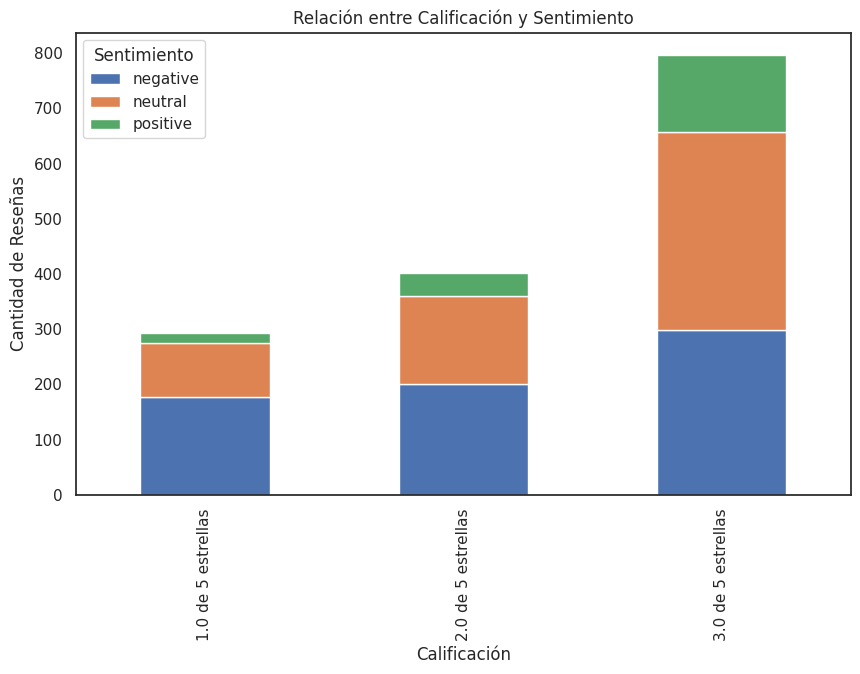

In [ ]:
sentiment_by_rating = df.groupby(['Calificación', 'Sentiment_BERT_2']).size().unstack(fill_value=0)
sentiment_by_rating.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Relación entre Calificación y Sentimiento')
plt.xlabel('Calificación')
plt.ylabel('Cantidad de Reseñas')
plt.legend(title='Sentimiento')
plt.show()

Con el modelo bert-base-uncased-emotion queremos obtener un análisis de comentarios donde se puedan identificar emociones específicas.

In [ ]:
emotion_detector = pipeline("text-classification", model="bhadresh-savani/bert-base-uncased-emotion")

In [ ]:
def emotion_det(text):
    result = emotion_detector(text[:512])
    return result[0]['label']

In [ ]:
df['Emotion_BERT'] = df['Datos limpios'].apply(emotion_det)

Aqui buscamos visualizar la distribución de las emociones en los comentarios del DataFrame.

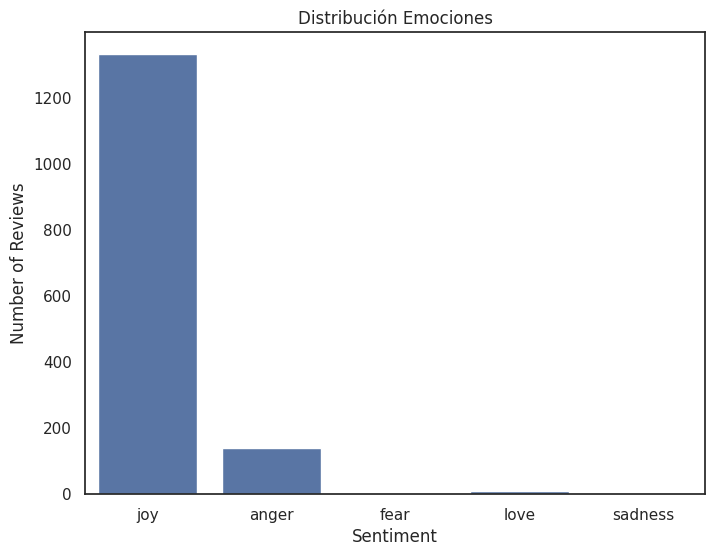

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x='Emotion_BERT', data=df)
plt.title('Distribución Emociones')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.show()

En esta gráfica buscamos visualizar cómo se distribuyen los sentimientos entre diferentes productos

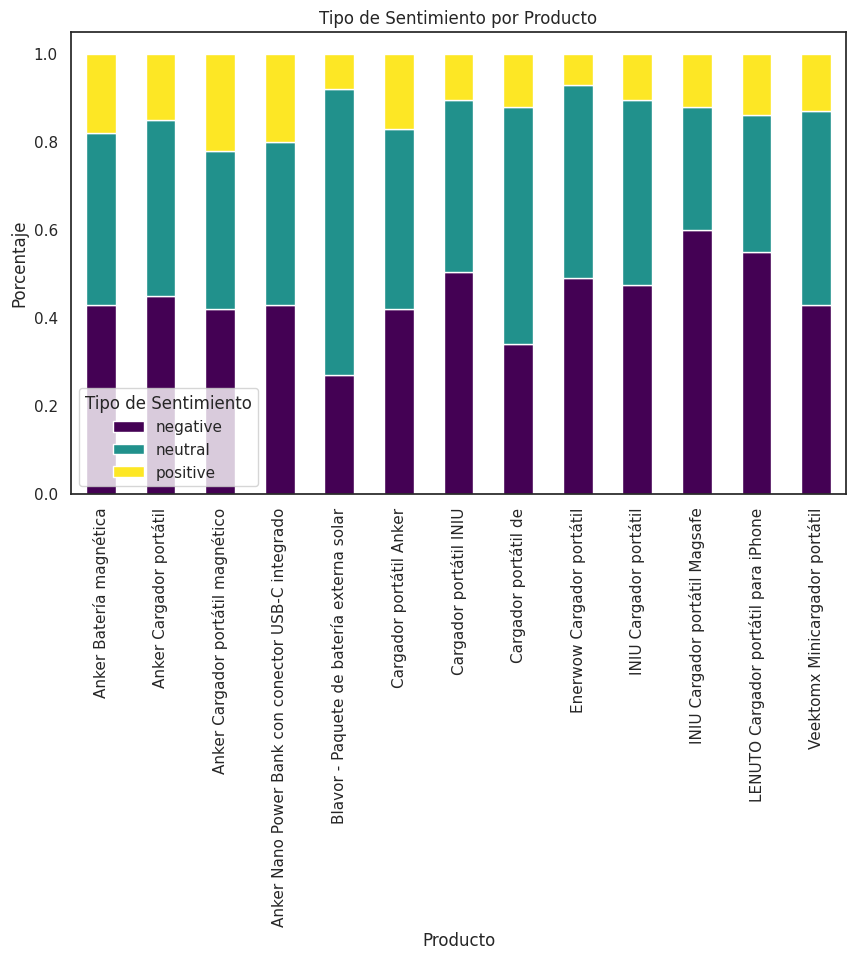

In [ ]:
# Calcular el porcentaje de cada tipo de sentimiento por producto
sentiment_variability = df.groupby('Nombre')['Sentiment_BERT_2'].value_counts(normalize=True).unstack()

# Graficar
sentiment_variability.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')

# Añadir etiquetas y título
plt.title('Tipo de Sentimiento por Producto')
plt.xlabel('Producto')
plt.ylabel('Porcentaje')
plt.legend(title='Tipo de Sentimiento')
plt.show()

### Categorías del texto

In [ ]:
import warnings
warnings.filterwarnings("ignore")

20. Procedemos a instalar BERTopic para procesar y analizar los volúmenes de datos textuales obtenidos a través de web scraping. El objetivo es  identificar temas recurrentes en los datos de manera eficiente, clasificar información y obtener insights valiosos.

In [ ]:
!pip install bertopic

In [ ]:
!pip install --upgrade httpx openai

21. A trave del modelo "paraphrase-MiniLM-L3-v2" buscamos obtener una representación semántica eficiente del texto extraído, facilitando la gestión de  agrupamiento de datos similares, la eliminación de duplicados, la clasificación de contenidos, el análisis de sentimiento y la mejora de los motores de búsqueda.

"%%time" nos permite medir el tiempo de ejecución del proceso.

In [ ]:
%%time
from bertopic import BERTopic
model = BERTopic(verbose=True,embedding_model='paraphrase-MiniLM-L3-v2', min_topic_size= 7)
headline_topics, _ = model.fit_transform(df['Datos limpios'])

2024-11-14 22:00:03,044 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/47 [00:00<?, ?it/s]

2024-11-14 22:00:49,206 - BERTopic - Embedding - Completed ✓
2024-11-14 22:00:49,209 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-11-14 22:00:58,532 - BERTopic - Dimensionality - Completed ✓
2024-11-14 22:00:58,538 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-11-14 22:00:58,794 - BERTopic - Cluster - Completed ✓
2024-11-14 22:00:58,800 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-11-14 22:00:59,111 - BERTopic - Representation - Completed ✓


CPU times: user 37.9 s, sys: 723 ms, total: 38.6 s
Wall time: 56.2 s


22. A traves del siguiente codigo vamos a revisar los resultados del modelado de temas, y validar como se distribuyen.

```
model.get_topic_info() devuelve información sobre los temas generados.
len(freq) muestra el número total de temas.
freq.head() ofrece un vistazo rápido a las primeras filas del DataFrame con la información de los tema.
```



In [ ]:
freq = model.get_topic_info()
print("Number of topics: {}".format( len(freq)))
freq.head()

Number of topics: 2


,Topic,Count,Name,Representation,Representative_Docs
0,0,1430,0_para_pero_este_esta,"[para, pero, este, esta, solo, energia, cuando...",[comprado varios productos anker siempre estad...
1,1,60,1_solar_para_energia_horas,"[solar, para, energia, horas, pero, como, pane...",[estas buscando banco energia solar pierdas bu...


23. Con el siguiente codigo queremos acceder a la información detallada sobre un temá especifico identificado por el modelo.



```
freq.iloc[1]["Topic"] extrae el ID del segundo tema desde el DataFrame freq.

model.get_topic(a_topic) devuelve las palabras clave que representan el tema
identificado por el ID a_topic, permitiendo entender mejor de qué trata ese tema.
```



In [ ]:
a_topic = freq.iloc[1]["Topic"]
model.get_topic(a_topic)

[('solar', 0.2348095289843056),
 ('para', 0.10955308225012872),
 ('energia', 0.08911247102107013),
 ('horas', 0.0699796210128491),
 ('pero', 0.06827752012959154),
 ('como', 0.05298093496687213),
 ('panel', 0.05263667187558514),
 ('funciona', 0.049940908989883376),
 ('bien', 0.04547473223781217),
 ('solo', 0.043535480576461526)]

24. Con este código buscamos visualizar los temas más relevantes generados por el modelo BERTopic en forma de un gráfico de barras y explorar la distribución de los temas para entender mejor cuántos documentos están asociados con cada tema.

In [ ]:
import plotly.express as px

# Obtener la información de los temas y las frecuencias de los 6 temas más relevantes
topic_info = model.get_topic_info()
top_n_topics = 4
top_topics = topic_info.head(top_n_topics)

# Crear un diccionario para mapear el ID del tema a su título descriptivo (palabras clave más relevantes)
topic_titles = {}
for topic_id in top_topics['Topic']:
    # Obtener las palabras clave más representativas de cada tema
    topic_keywords = model.get_topic(topic_id)
    # Crear el título usando las primeras 3 palabras clave
    topic_titles[topic_id] = ' | '.join([word for word, _ in topic_keywords[:3]])

# Crear una lista de los valores para el gráfico
topic_data = {
    "Topic ID": top_topics['Topic'],
    "Frecuencia": top_topics['Count'],
    "Título del Tema": [topic_titles[topic_id] for topic_id in top_topics['Topic']]
}

# Crear un DataFrame para trabajar con Plotly
df_topic_data = pd.DataFrame(topic_data)

# Crear el gráfico de barras con Plotly
fig = px.bar(df_topic_data,
             x='Título del Tema',
             y='Frecuencia',
             title="Frecuencia de los 6 temas más relevantes",
             color_discrete_sequence=['green'])  # Color verde para las barras

# Establecer el fondo blanco para el gráfico
fig.update_layout(
    plot_bgcolor='white',  # Fondo del área de trazado
    paper_bgcolor='white',  # Fondo del gráfico completo
    title_font=dict(size=14, family='Arial'),  # Tamaño y fuente del título
    xaxis_title_font=dict(size=12),  # Tamaño del título del eje X
    yaxis_title_font=dict(size=12)   # Tamaño del título del eje Y
)

# Mostrar el gráfico
fig.show()


In [ ]:
model.visualize_hierarchy()

In [ ]:
model.visualize_barchart(top_n_topics=6)

In [ ]:
import unicodedata

In [ ]:
# Definir patrones de palabras clave para cada tema usando expresiones regulares
keywords_rendimiento = [r'calidad', r'bueno', r'excelente', r'perfect[oa]', r'material', r'mal[oa]s?', r'defectuos[oa]',
                        r'lent[oa]s?', r'bien', r'funciona', r'encanta', r'descarg[ao]', r'dur[a]', r'agot[a]', r'queda',
                        r'disen[oa]', r'rendimiento', r'potencia']
keywords_diseno = [r'disen[oa]', r'grand[ea]', r'pesad[oa]', r'lind[oa]', r'pequeñ[oa]']
keywords_tiempo_entrega = [r'entreg[ao]', r'lleg[ao]', r'demor[ao]', r'tard[óo]?', r'rápid[oa]s?', r'retras[ao]',
                           r'pronto', r'tiempo']
keywords_precio = [r'preci[oa]s?', r'car[oa]s?', r'barat[oa]s?', r'cost[oa]s?', r'valores?']

# Función para normalizar el texto (eliminar tildes y convertir a minúsculas)
def normalize_text(text):
    """Elimina tildes y convierte el texto a minúsculas."""
    if not isinstance(text, str):  # Verificar si el texto es una cadena
        return ''  # Retornar una cadena vacía si no es texto
    text = text.lower()  # Convertir a minúsculas
    return ''.join(
        char for char in unicodedata.normalize('NFD', text)
        if unicodedata.category(char) != 'Mn'
    )

# Función para etiquetar los comentarios en múltiples categorías
def categorize_comment(comment):
    comment = normalize_text(comment)  # Normalizar el comentario
    categories = []

    # Verificar si los patrones están en el comentario y añadir la categoría correspondiente
    if any(re.search(pattern, comment) for pattern in keywords_rendimiento):
        categories.append('Rendimiento')
    if any(re.search(pattern, comment) for pattern in keywords_diseno):
        categories.append('Diseño')
    if any(re.search(pattern, comment) for pattern in keywords_tiempo_entrega):
        categories.append('Tiempo de Entrega')
    if any(re.search(pattern, comment) for pattern in keywords_precio):
        categories.append('Precio')

    # Retornar las categorías encontradas, o "Otros" si no hay coincidencias
    return ', '.join(categories) if categories else 'Otros'

In [ ]:
# Aplicar la función a la columna de comentarios
df['Categoria'] = df['Datos limpios'].apply(categorize_comment)

# Ver los primeros comentarios clasificados
print(df[['Datos limpios', 'Categoria']])

                                          Datos limpios  \
0                     iphone desde hasta descargo hasta   
1     editar bueno duro mucho indicador esta parcial...   
2     este producto resultado util pero solo usado u...   
3     lentamente grande modelo moderadamente caro mi...   
4     finalmente pudimos completamente este despues ...   
...                                                 ...   
1485  puede usar porque cubierta plastico cubre parc...   
1486  cada enchufo articulo para cargarlo tengo pres...   
1487                      producto funciona apenas duro   
1488  lamento haber tenido devolverlo tiene cable co...   
1489  esta cosa tarda eternidad cargarse menos horas...   

                                           Categoria  
0                                        Rendimiento  
1                                Rendimiento, Precio  
2                                              Otros  
3     Rendimiento, Diseño, Tiempo de Entrega, Precio  
4               

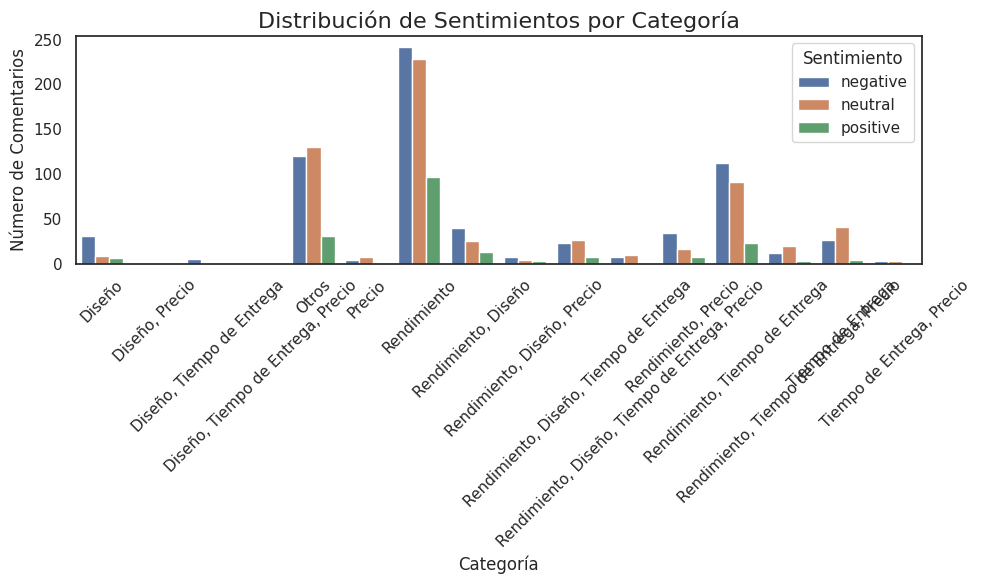

In [ ]:
# Contar los sentimientos por categoría
df_sentiment_category = df.groupby(['Categoria', 'Sentiment_BERT_2']).size().reset_index(name='Count')

# Crear el gráfico de barras usando Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Categoria', y='Count', hue='Sentiment_BERT_2', data=df_sentiment_category)

# Personalización del gráfico
plt.title('Distribución de Sentimientos por Categoría', fontsize=16)
plt.xlabel('Categoría', fontsize=12)
plt.ylabel('Número de Comentarios', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Sentimiento')

# Mostrar gráfico
plt.tight_layout()
plt.show()

In [ ]:
# Ejemplos de comentarios críticos
data = {
    'ejemplo': [
        "La calidad del powerbank es muy mala, no dura nada la carga y se descarga rápido.",
        "El diseño es bonito, pero es demasiado pesado y grande para llevarlo en el bolsillo.",
        "Tardó mucho en llegar, el tiempo de entrega fue más de lo esperado.",
        "El precio es muy alto para lo que ofrece, es demasiado caro.",
        "La batería dura bastante y la potencia es adecuada, aunque el material parece algo frágil.",
        "Llegó con un día de retraso, pero el producto funciona bien.",
        "Muy buen producto, pero me parece un poco caro.",
        "Es barato, pero la calidad no es la mejor. La batería se agota muy rápido.",
        "El diseño está lindo, aunque es un poco grande.",
        "La entrega fue rápida, llegó antes de lo esperado, pero el precio es alto.",
        "Se siente de buena calidad, pero esperaba algo más pequeño y liviano.",
        "No vale el precio. Demasiado costoso para lo que ofrece, no lo recomiendo.",
        "La carga es muy lenta, no parece tener la potencia adecuada.",
        "Me gusta el diseño y el tamaño, pero la batería se descarga rápido.",
        "El powerbank funciona bien, pero es muy caro para lo que es.",
    ]
}

# Crear el DataFrame con los comentarios de ejemplo
import pandas as pd
datos = pd.DataFrame(data)


In [ ]:
# Aplicar la función de categorización
datos['Categoria'] = datos['ejemplo'].apply(categorize_comment)

# Ver los comentarios clasificados
datos

,ejemplo,Categoria
0,"La calidad del powerbank es muy mala, no dura ...",Rendimiento
1,"El diseño es bonito, pero es demasiado pesado ...","Rendimiento, Diseño"
2,"Tardó mucho en llegar, el tiempo de entrega fu...",Tiempo de Entrega
3,"El precio es muy alto para lo que ofrece, es d...",Precio
4,La batería dura bastante y la potencia es adec...,Rendimiento
5,"Llegó con un día de retraso, pero el producto ...","Rendimiento, Tiempo de Entrega"
6,"Muy buen producto, pero me parece un poco caro.",Precio
7,"Es barato, pero la calidad no es la mejor. La ...","Rendimiento, Precio"
8,"El diseño está lindo, aunque es un poco grande.","Rendimiento, Diseño"
9,"La entrega fue rápida, llegó antes de lo esper...","Tiempo de Entrega, Precio"


In [ ]:
!pip install dash
!pip install dash-bootstrap-components

In [ ]:
import io
import base64
from PIL import Image
from dash import Dash, dcc, html
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
# Contar los sentimientos por categoría
df_sentiment_category = df.groupby(['Categoria', 'Sentiment_BERT_2']).size().reset_index(name='Count')

In [ ]:

# Crear el gráfico de torta usando Plotly Express
fig_pie = px.pie(
    df_sentiment_category,
    names='Sentiment_BERT_2',
    values='Count',
    title='Distribución de Sentimientos General',
    labels={'Sentiment_Textblob': 'Sentimiento', 'Count': 'Número de Comentarios'},
    hole=0.3  # Hace el gráfico de torta un gráfico de dona (opcional)
)

# Ajustes adicionales del gráfico de torta
fig_pie.update_layout(
    title_font_size=16,
    legend_title_text='Sentimiento'
)


# Crear el gráfico de barras usando Plotly Express
fig_bar = px.bar(
    df_sentiment_category,
    x='Categoria',
    y='Count',
    color='Sentiment_BERT_2',
    title='Distribución de Sentimientos por Categoría',
    labels={'Categoria': 'Categoría', 'Count': 'Número de Comentarios'},
    barmode='group'
)

# Ajustes adicionales del gráfico de barras
fig_bar.update_layout(
    xaxis_title="Categoría",
    yaxis_title="Número de Comentarios",
    title_font_size=16,
    legend_title_text='Sentimiento'
)


# Crear la nube de palabras
text_data  = ' '.join(df['tokenizadas'].dropna())  # Asegúrate de tener una columna 'Comentario' con los textos

wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text_data)

# Convertir la nube de palabras a imagen y luego a base64
img = wordcloud.to_image()
buffer = io.BytesIO()
img.save(buffer, format="PNG")
buffer.seek(0)
img_str = base64.b64encode(buffer.read()).decode("utf-8")


# Crear el gráfico de barras apiladas para el tipo de sentimiento por producto
sentiment_variability = df.groupby('Nombre')['Sentiment_BERT_2'].value_counts(normalize=True).unstack().fillna(0)

# Crear la figura con plotly.graph_objects
fig_variability = go.Figure()

# Añadir cada serie de sentimiento como una barra apilada
for sentiment in sentiment_variability.columns:
    fig_variability.add_trace(go.Bar(
        x=sentiment_variability.index,
        y=sentiment_variability[sentiment],
        name=sentiment
    ))


# Ajustar el tamaño de las etiquetas del eje X
fig_variability.update_layout(
    title='Tipo de Sentimiento por Producto',
    xaxis_title='Producto',
    yaxis_title='Porcentaje',
    title_font_size=16,
    xaxis=dict(
        tickfont=dict(size=8)  # Ajusta el tamaño de las etiquetas del eje X
    ),
    yaxis=dict(
        tickfont=dict(size=12)  # Ajusta el tamaño de las etiquetas del eje Y (si también lo quieres)
    ),
    barmode='stack'
)


# Crear la aplicación Dash
app = Dash(__name__)

# Layout de la aplicación con los tres gráficos
app.layout = html.Div([
    html.H1("Dashboard de Análisis de Comentarios Powerbank Amazon", style={'textAlign': 'center'}),

    # Gráfico 1: Distribución de Sentimientos General (Torta)
    html.Div([
        dcc.Graph(id="sentiment-pie-chart", figure=fig_pie),
    ], style={'display': 'inline-block', 'width': '31%', 'margin': '0 1%' }),

    # Gráfico 2: Tipo de Sentimiento por Producto (Barras apiladas)
        html.Div([
        dcc.Graph(id="sentiment-variability-chart", figure=fig_variability)
    ], style={'display': 'inline-block', 'width': '31%','margin': '0 1%'}),


    # Gráfico 4: Nube de Palabras
    html.Div([
        html.H3("Nube de Palabras"),
        html.Img(src="/assets/wordcloud_image.png", style={'width': '96%'})
    ], style={'display': 'inline-block', 'width': '100%','margin': '0 1%'}),

    # Gráfico 5:  Distribución de Sentimientos por Categoría (Barras)
    html.Div([
        dcc.Graph(id="sentiment-bar-chart", figure=fig_bar),
    ], style={'display': 'inline-block', 'width': '48%','margin': '0 1%'}),


], style={'backgroundColor': '#f0f0f0'})

# Ejecutar la aplicación
if __name__ == "__main__":
    app.run_server(debug=True)

<IPython.core.display.Javascript object>